# Intrinsic calibration

- Acquire images of checkerboard
- Use matlab cameraCalibration to calibration each camera
- export your calibration with export_singlecamera_foropencv.m


# Extrinsic calibration
- Create a manhattan
- Acquire image of the manhattan from each camera
- Use ivTrace to create a .tra with tower marked
    - carefull the numbering is important
    - if you can not see a tower place the marker to the closest to the top-left corner
- Measure the manhattan and save its dimension in a pandas dataframe
- calibrate
    

## Manhattan in pandas

In [1]:
# the manhattan created in pandas and saved in hdf
manhattan_filename = 'manhattan_0001.hdf'

/home/bolirev/.virtualenvs/toolbox-tracking/lib/python3.6/site-packages/pandas-0.22.0-py3.6-linux-x86_64.egg/pandas/core/generic.py:1471: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer-float,key->block0_values] [items->['x', 'y', 'z']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


(<matplotlib.figure.Figure at 0x7fc74ddc26a0>,
  <matplotlib.axes._subplots.Axes3DSubplot at 0x7fc709474dd8>])

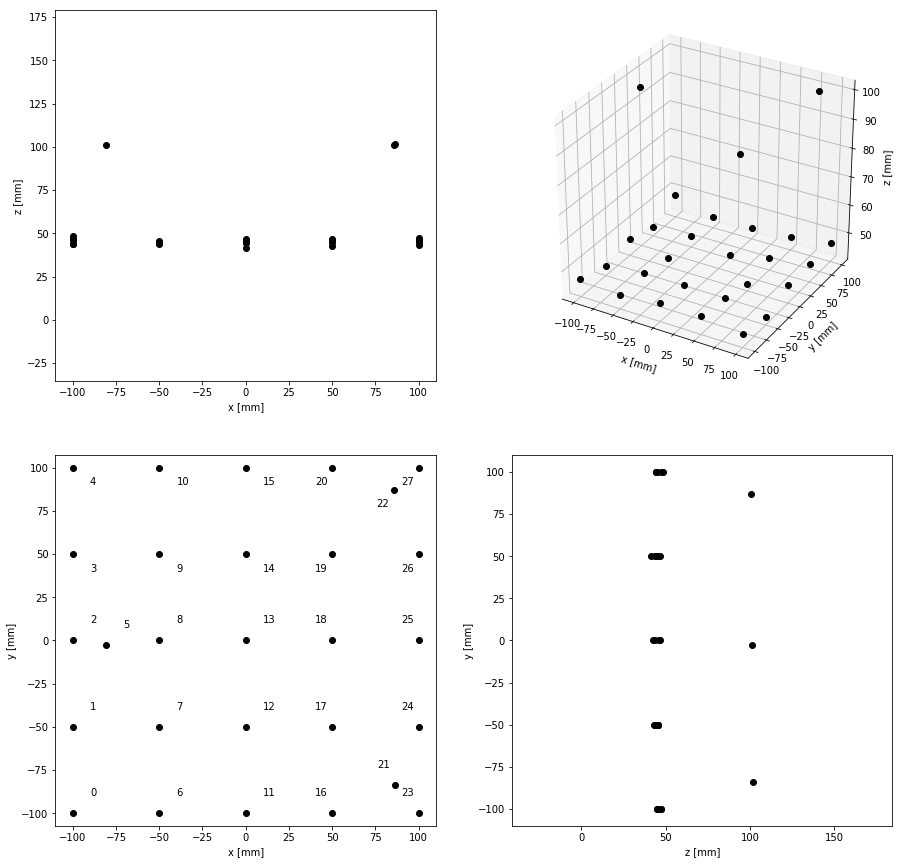

In [3]:
import numpy as np
import pandas as pd
import btracker.plot as mplot

manhattan_3d = pd.DataFrame(index = range(28),
                            columns = ['x','y','z'])
manhattan_3d.loc[0,:] = [-10, -10, 4.66]
manhattan_3d.loc[1,:] = [-10, -5, 4.39]
manhattan_3d.loc[2,:] = [-10, -0, 4.63]
manhattan_3d.loc[3,:] = [-10, +5, 4.38]
manhattan_3d.loc[4,:] = [-10, +10, 4.85]

manhattan_3d.loc[5,:] = [-8.09, -0.25, 10.13]

manhattan_3d.loc[6,:] = [-5, -10, 4.52]
manhattan_3d.loc[7,:] = [-5, -5, 4.57]
manhattan_3d.loc[8,:] = [-5, -0, 4.36]
manhattan_3d.loc[9,:] = [-5, +5, 4.45]
manhattan_3d.loc[10,:] = [-5, +10, 4.43]

manhattan_3d.loc[11,:] = [0, -10, 4.70]
manhattan_3d.loc[12,:] = [0, -5, 4.57]
manhattan_3d.loc[13,:] = [0, -0, np.nan]
manhattan_3d.loc[14,:] = [0, +5, 4.16]
manhattan_3d.loc[15,:] = [0, +10, 4.43]

manhattan_3d.loc[16,:] = [+5, -10, 4.70]
manhattan_3d.loc[17,:] = [+5, -5, 4.56]
manhattan_3d.loc[18,:] = [+5, -0, 4.27]
manhattan_3d.loc[19,:] = [+5, +5, 4.49]
manhattan_3d.loc[20,:] = [+5, +10, 4.50]

manhattan_3d.loc[21,:] = [+8.62, -8.38, 10.19]
manhattan_3d.loc[22,:] = [+8.55, +8.72, 10.09]

manhattan_3d.loc[23,:] = [+10, -10, 4.51]
manhattan_3d.loc[24,:] = [+10, -5, 4.33]
manhattan_3d.loc[25,:] = [+10, -0, 4.69]
manhattan_3d.loc[26,:] = [+10, +5, 4.69]
manhattan_3d.loc[27,:] = [+10, +10, 4.71]

manhattan_3d*=10
manhattan_3d.name='manhattan'
manhattan_3d.unit='mm'


manhattan_3d.to_hdf(manhattan_filename, manhattan_3d.name)
mplot.manhattan(manhattan_3d)

## Calibrate

In [4]:
from btracker.io import opencv as opencv_io
from btracker.calib import calibrates_extrinsic

### Create file templates

In [6]:
# where to save the calibration
filename_fullcalib = '/media/bolirev/BOMBUS_SYLV/Calibrations/20180118_checkerboard/calibration.xml'
# a template to load intrinsic param
template_intrinsics = '/media/bolirev/BOMBUS_SYLV/Calibrations/20180118_checkerboard/cam_{}.xml'
# a template to load extrinsic param
template_manhattans = '/media/bolirev/BOMBUS_SYLV/Calibrations/20180118_checkerboard/Manhattans/cam_{}.tra'
# number of cameras
ncams = 3
# threshold to exclude point in top-left corner of manhattan
corner_th = 60 # in pixel

### Load 2d manhattan and intrinsics

In [7]:
filenames = dict()
for cam_i in range(ncams):
    filenames[cam_i]=template_intrinsics.format(cam_i)   

cameras_intrinsics = opencv_io.cameras_intrinsic_calibration(filenames)

filenames = dict()
for cam_i in range(ncams):
    filenames[cam_i]=template_manhattans.format(cam_i)

### Calibrate and save

In [8]:
cameras_extrinsics=calibrates_extrinsic(filenames, manhattan_filename, cameras_intrinsics, corner_th)
opencv_io.save_cameras_calibration(cameras_intrinsics, cameras_extrinsics, filename_fullcalib, overwrite = True)